# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# EDA

In [2]:
df = pd.read_csv("profit.csv")

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [6]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.582434,0.978407,0.945245
Administration,0.582434,1.000000,0.520465,0.741560
Marketing Spend,0.978407,0.520465,1.000000,0.917270
Profit,0.945245,0.741560,0.917270,1.000000


<AxesSubplot:>

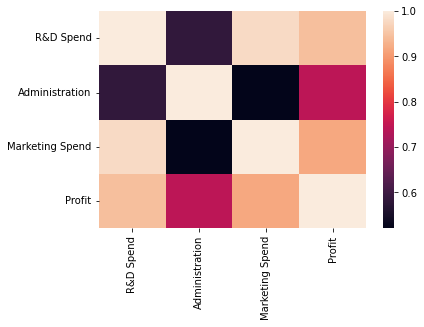

In [7]:
sns.heatmap(df.corr())

In [8]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [9]:
X = df[["R&D Spend","Administration","Marketing Spend"]]
X

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.800,471784.1000
1,162597.70,151377.590,443898.5300
2,153441.51,101145.550,407934.5400
3,144372.41,118671.850,383199.6200
4,142107.34,91391.770,366168.4200
...,...,...,...
995,54135.00,118451.999,173232.6695
996,134970.00,130390.080,329204.0228
997,100275.47,241926.310,227142.8200
998,128456.23,321652.140,281692.3200


In [10]:
Y = df[["Profit"]]
Y

,Profit
0,192261.83000
1,191792.06000
2,191050.39000
3,182901.99000
4,166187.94000
...,...
995,95279.96251
996,164336.60550
997,413956.48000
998,333962.19000


# Visualisation

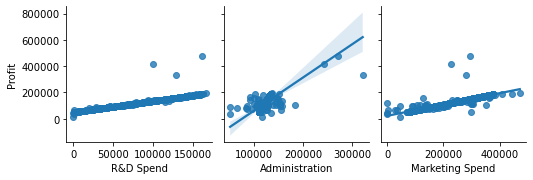

In [11]:
sns.pairplot(df, x_vars = X, y_vars = Y, kind = 'reg')

<AxesSubplot:xlabel='R&D Spend', ylabel='Profit'>

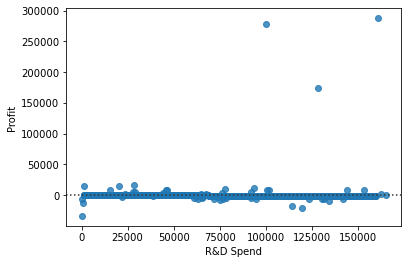

In [12]:
sns.residplot(x = "R&D Spend", y = "Profit", data = df)

# Splitting the data into train and test

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size = 0.2, random_state = 0)
x_train

,R&D Spend,Administration,Marketing Spend
687,38385.0,116125.9672,142843.00150
500,125610.0,129007.7526,311143.87720
332,101322.0,125420.7901,264280.11490
979,12914.0,112364.2939,93696.63744
817,109909.0,126688.9574,280848.75480
...,...,...,...
835,110391.0,126760.1413,281778.77510
192,53078.0,118295.8964,171193.18510
629,22876.0,113835.5275,112918.34360
559,66766.0,120317.4026,197604.21850


# Building the linear Regression model

In [14]:
lm = LinearRegression()
lm

LinearRegression()

In [15]:
lm.fit(x_train,y_train)

LinearRegression()

In [16]:
y_hat = lm.predict(x_test)
y_hat

array([[ 89277.93054003],
       [ 87914.47646729],
       [ 94381.65899976],
       [176043.03107892],
       [ 83597.58708608],
       [110755.97826629],
       [132203.39808538],
       [ 90960.58209961],
       [164777.58862235],
       [ 53593.01784897],
       [ 66439.00295311],
       [150930.24999022],
       [126400.09021075],
       [ 58827.17115615],
       [176995.47531643],
       [ 75502.66876761],
       [118614.07271066],
       [164056.81999329],
       [171382.58712591],
       [182248.50594104],
       [119169.40047641],
       [ 85157.5364504 ],
       [181354.4095907 ],
       [ 83632.76748754],
       [104492.155517  ],
       [100720.13283149],
       [ 54102.82823857],
       [ 57069.0105291 ],
       [ 68385.07833508],
       [209487.80143381],
       [121144.48546932],
       [111210.74895612],
       [101672.57715358],
       [138323.66305576],
       [ 63458.96777026],
       [108343.97745534],
       [186193.85616801],
       [171805.08295377],
       [1750

# Calculating regression coffecient, intercept  and R^2 

In [17]:
lm.intercept_

array([-51639.7882535])

In [18]:
lm.coef_

array([[0.52737847, 0.8458277 , 0.10664082]])

we get a final linear function with the structure:
 
                                       Yhat = b_0 = b_1X_1 + b_2X_2 + B_3X_3

Profit = -51639.7882535 + 0.52737847 x R&D Spend + 0.845827 x Administration +  0.10664082 x Marketing Spend 

In [19]:
r2_score(y_test,y_hat)

0.9117375294964101